# Text Analytics  - NIPS Case Study

In [4]:
%%html
<a href="https://www.kaggle.com/benhamner/nips-papers">Download the data from here</a>
<ul>Do these steps first
<li>  Install nltk package - "pip install nltk"</li>
<li>  Install wordcloud package - "pip install wordcloud"</li>
</ul>

In [37]:
# Import Libraries
import pandas as pd
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\spasula\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
# load the dataset
NIPS_Papers = pd.read_csv('C:/Users/spasula/Desktop/Speech to Text/1.Data Collection/NIPS/papers.csv')
Unfiltered = NIPS_Papers.shape

In [3]:
# Filter for only Filled Abstract
NIPS_Papers= NIPS_Papers[NIPS_Papers['abstract']!='Abstract Missing']
Filtered = NIPS_Papers.shape
print('Before:',Unfiltered[0],'rows || After:',Filtered[0],'rows')

Before: 7241 rows || After: 3924 rows


In [4]:
NIPS_Papers.head()

,id,year,title,event_type,pdf_name,abstract,paper_text
941,1861,2000,Algorithms for Non-negative Matrix Factorization,NaN,1861-algorithms-for-non-negative-matrix-factor...,Non-negative matrix factorization (NMF) has pr...,Algorithms for Non-negative Matrix\nFactorizat...
1067,1975,2001,Characterizing Neural Gain Control using Spike...,NaN,1975-characterizing-neural-gain-control-using-...,Spike-triggered averaging techniques are effec...,Characterizing neural gain control using\nspik...
2384,3163,2007,Competition Adds Complexity,NaN,3163-competition-adds-complexity.pdf,It is known that determinining whether a DEC-P...,Competition adds complexity\n\nJudy Goldsmith\...
2385,3164,2007,Efficient Principled Learning of Thin Junction...,NaN,3164-efficient-principled-learning-of-thin-jun...,We present the first truly polynomial algorith...,Efficient Principled Learning of Thin Junction...
2388,3167,2007,Regularized Boost for Semi-Supervised Learning,NaN,3167-regularized-boost-for-semi-supervised-lea...,Semi-supervised inductive learning concerns ho...,Regularized Boost for Semi-Supervised Learning...


In [5]:
# Fetch wordcount for each abstract
NIPS_Papers['abstract1'] = NIPS_Papers['title'] + NIPS_Papers['abstract']
NIPS_Papers['word_count'] = NIPS_Papers['abstract1'].apply(lambda x: len(str(x).split(" ")))
NIPS_Papers[['abstract1','word_count']].head()

,abstract1,word_count
941,Algorithms for Non-negative Matrix Factorizati...,111
1067,Characterizing Neural Gain Control using Spike...,87
2384,Competition Adds ComplexityIt is known that de...,69
2385,Efficient Principled Learning of Thin Junction...,149
2388,Regularized Boost for Semi-Supervised Learning...,123


In [6]:
# Descriptive statistics of word counts
NIPS_Papers.word_count.describe()

count    3924.000000
mean      154.888124
std        46.001025
min        26.000000
25%       121.000000
50%       150.000000
75%       184.000000
max       324.000000
Name: word_count, dtype: float64

In [15]:
# Identify 20 common words
Common_20_List = pd.Series(' '.join(NIPS_Papers['abstract1']).split()).value_counts()[:20]
Common_20_List

the         30107
of          21685
a           16518
and         14218
to          13104
in           9454
for          8382
that         7841
is           7687
on           5704
we           5167
with         5142
We           5003
as           3686
this         3677
are          3546
an           3398
by           3302
can          2958
learning     2890
dtype: int64

In [17]:
# Identify 20 uncommon words
Unommon_20_List = pd.Series(' '.join(NIPS_Papers['abstract1']).split()).value_counts()[-20:]
Unommon_20_List

mmDGMs                  1
underestimated.         1
''time''.               1
(\emph{I-theory})       1
instance-,              1
monotonically,          1
matrix-factorization    1
discounted.             1
forthcoming             1
Mapping}                1
Malicious               1
Bias:                   1
Coagent                 1
V2Motivated             1
Discrete-Continuous     1
(~0.1s);                1
losslessly.             1
Spaces:                 1
Auditing:               1
$\circ$                 1
dtype: int64

In [40]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer

nltk.download('wordnet')
from nltk.stem.wordnet import WordNetLemmatizer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\spasula\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\spasula\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


In [41]:
# Creating a list of stop words and adding custom stopwords
stop_words = set(stopwords.words("english"))
# Creating a list of custom stopwords
new_words = ["using", "show", "result", "large", "also", "iv", "one", "two", "new", "previously", "shown"]
stop_words = stop_words.union(new_words)

In [49]:
corpus = []
for i in range(0, 3847):
    #Remove punctuations
    text = re.sub('[^a-zA-Z]', ' ', list(NIPS_Papers['abstract1'])[i])
    
    #Convert to lowercase
    text = text.lower()
    
    #remove tags
    text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)
    
    # remove special characters and digits
    text=re.sub("(\\d|\\W)+"," ",text)
    
    ##Convert to list from string
    text = text.split()
    
    ##Stemming
    ps=PorterStemmer()
    #Lemmatisation
    lem = WordNetLemmatizer()
    text = [lem.lemmatize(word) for word in text if not word in  
            stop_words] 
    text = " ".join(text)
    corpus.append(text)

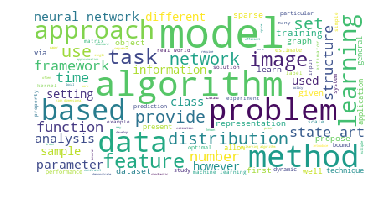

In [54]:
#Word cloud
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stop_words,
                          max_words=100,
                          max_font_size=50, 
                          random_state=42
                         ).generate(str(corpus))
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
# fig.savefig("word1.png", dpi=900)

# Text preparation - Tokenisation & Vectorisation

In [64]:
from sklearn.feature_extraction.text import CountVectorizer
import re
cv=CountVectorizer(max_df=0.8,stop_words=stop_words, max_features=10000, ngram_range=(1,3))
X=cv.fit_transform(corpus)

In [65]:
list(cv.vocabulary_.keys())[:10]

['algorithm',
 'non',
 'negative',
 'matrix',
 'factorization',
 'nmf',
 'useful',
 'decomposition',
 'multivariate',
 'data']

[Text(0, 0, 'model'),
 Text(0, 0, 'algorithm'),
 Text(0, 0, 'learning'),
 Text(0, 0, 'method'),
 Text(0, 0, 'problem'),
 Text(0, 0, 'data'),
 Text(0, 0, 'approach'),
 Text(0, 0, 'function'),
 Text(0, 0, 'based'),
 Text(0, 0, 'network'),
 Text(0, 0, 'time'),
 Text(0, 0, 'paper'),
 Text(0, 0, 'task'),
 Text(0, 0, 'result'),
 Text(0, 0, 'distribution'),
 Text(0, 0, 'feature'),
 Text(0, 0, 'propose'),
 Text(0, 0, 'state'),
 Text(0, 0, 'image'),
 Text(0, 0, 'bound')]

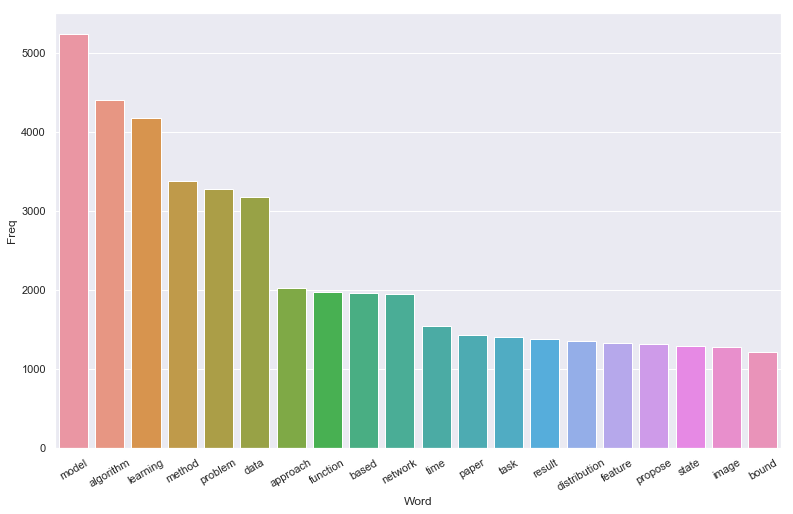

In [68]:
#Most frequently occuring words
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in      
                   vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                       reverse=True)
    return words_freq[:n]
#Convert most freq words to dataframe for plotting bar plot
top_words = get_top_n_words(corpus, n=20)
top_df = pd.DataFrame(top_words)
top_df.columns=["Word", "Freq"]
#Barplot of most freq words
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
g = sns.barplot(x="Word", y="Freq", data=top_df)
g.set_xticklabels(g.get_xticklabels(), rotation=30)

                   Bi-gram  Freq
0                state art   698
1           neural network   598
2         machine learning   404
3               real world   368
4         high dimensional   362
5       learning algorithm   345
6              lower bound   264
7          graphical model   246
8                 data set   232
9            paper propose   232
10  reinforcement learning   231
11                low rank   229
12        gaussian process   228
13     experimental result   219
14    optimization problem   215
15           loss function   207
16        gradient descent   197
17             monte carlo   193
18     stochastic gradient   187
19        learning problem   179


[Text(0, 0, 'state art'),
 Text(0, 0, 'neural network'),
 Text(0, 0, 'machine learning'),
 Text(0, 0, 'real world'),
 Text(0, 0, 'high dimensional'),
 Text(0, 0, 'learning algorithm'),
 Text(0, 0, 'lower bound'),
 Text(0, 0, 'graphical model'),
 Text(0, 0, 'data set'),
 Text(0, 0, 'paper propose'),
 Text(0, 0, 'reinforcement learning'),
 Text(0, 0, 'low rank'),
 Text(0, 0, 'gaussian process'),
 Text(0, 0, 'experimental result'),
 Text(0, 0, 'optimization problem'),
 Text(0, 0, 'loss function'),
 Text(0, 0, 'gradient descent'),
 Text(0, 0, 'monte carlo'),
 Text(0, 0, 'stochastic gradient'),
 Text(0, 0, 'learning problem')]

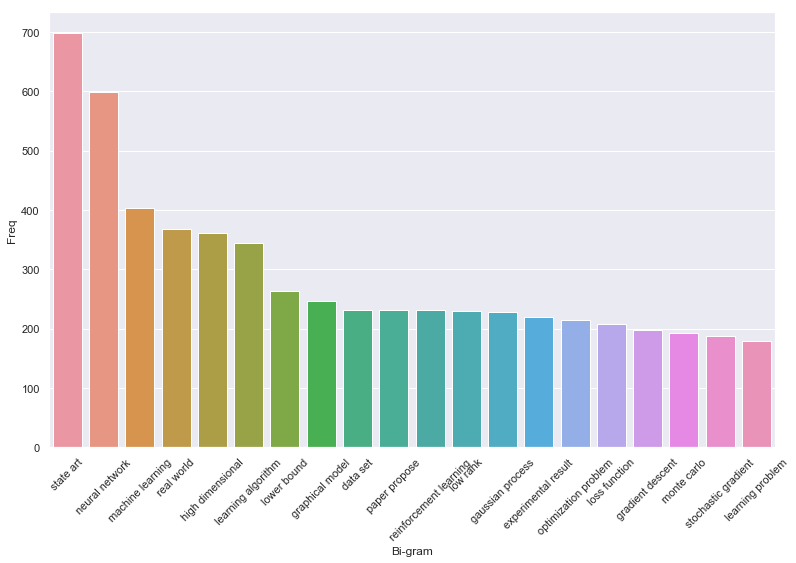

In [69]:
#Most frequently occuring Bi-grams
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),  
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]
top2_words = get_top_n2_words(corpus, n=20)
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
print(top2_df)
#Barplot of most freq Bi-grams
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
h=sns.barplot(x="Bi-gram", y="Freq", data=top2_df)
h.set_xticklabels(h.get_xticklabels(), rotation=45)

                        Tri-gram  Freq
0   convolutional neural network   103
1            deep neural network    98
2          state art performance    82
3    stochastic gradient descent    80
4            real world datasets    76
5       recurrent neural network    72
6               state art method    72
7                low rank matrix    70
8       semi supervised learning    69
9             multi armed bandit    68
10               real world data    68
11       markov decision process    66
12          synthetic real world    61
13         latent variable model    60
14         outperforms state art    60
15             chain monte carlo    57
16            markov chain monte    56
17              state art result    55
18   empirical risk minimization    52
19  principal component analysis    49


[Text(0, 0, 'convolutional neural network'),
 Text(0, 0, 'deep neural network'),
 Text(0, 0, 'state art performance'),
 Text(0, 0, 'stochastic gradient descent'),
 Text(0, 0, 'real world datasets'),
 Text(0, 0, 'recurrent neural network'),
 Text(0, 0, 'state art method'),
 Text(0, 0, 'low rank matrix'),
 Text(0, 0, 'semi supervised learning'),
 Text(0, 0, 'multi armed bandit'),
 Text(0, 0, 'real world data'),
 Text(0, 0, 'markov decision process'),
 Text(0, 0, 'synthetic real world'),
 Text(0, 0, 'latent variable model'),
 Text(0, 0, 'outperforms state art'),
 Text(0, 0, 'chain monte carlo'),
 Text(0, 0, 'markov chain monte'),
 Text(0, 0, 'state art result'),
 Text(0, 0, 'empirical risk minimization'),
 Text(0, 0, 'principal component analysis')]

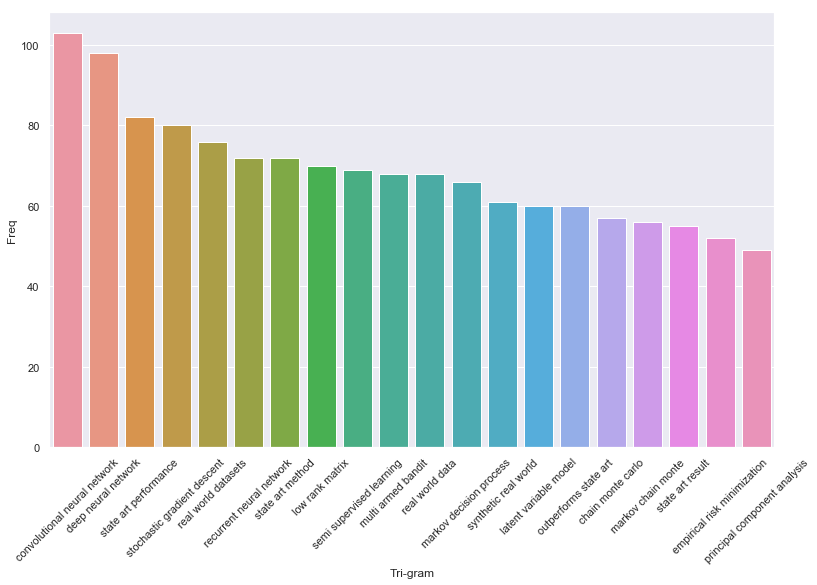

In [70]:
#Most frequently occuring Tri-grams
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3), 
           max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]
top3_words = get_top_n3_words(corpus, n=20)
top3_df = pd.DataFrame(top3_words)
top3_df.columns=["Tri-gram", "Freq"]
print(top3_df)
#Barplot of most freq Tri-grams
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
j=sns.barplot(x="Tri-gram", y="Freq", data=top3_df)
j.set_xticklabels(j.get_xticklabels(), rotation=45)

In [76]:
from sklearn.feature_extraction.text import TfidfTransformer
 
tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_transformer.fit(X)
# get feature names
feature_names=cv.get_feature_names()
 
# fetch document for which keywords needs to be extracted
doc=corpus[520]
 
#generate tf-idf for the given document
tf_idf_vector=tfidf_transformer.transform(cv.transform([doc]))

In [77]:
#Function for sorting tf_idf in descending order
from scipy.sparse import coo_matrix
def sort_coo(coo_matrix):
    tuples = zip(coo_matrix.col, coo_matrix.data)
    return sorted(tuples, key=lambda x: (x[1], x[0]), reverse=True)
 
def extract_topn_from_vector(feature_names, sorted_items, topn=10):
    """get the feature names and tf-idf score of top n items"""
    
    #use only topn items from vector
    sorted_items = sorted_items[:topn]
 
    score_vals = []
    feature_vals = []
    
    # word index and corresponding tf-idf score
    for idx, score in sorted_items:
        
        #keep track of feature name and its corresponding score
        score_vals.append(round(score, 3))
        feature_vals.append(feature_names[idx])
 
    #create a tuples of feature,score
    #results = zip(feature_vals,score_vals)
    results= {}
    for idx in range(len(feature_vals)):
        results[feature_vals[idx]]=score_vals[idx]
    
    return results
#sort the tf-idf vectors by descending order of scores
sorted_items=sort_coo(tf_idf_vector.tocoo())
#extract only the top n; n here is 10
keywords=extract_topn_from_vector(feature_names,sorted_items,5)
 
# now print the results
print("\nAbstract:")
print(doc)
print("\nKeywords:")
for k in keywords:
    print(k,keywords[k])


Abstract:
free energy score spacescore function induced generative model extract fixed dimension feature vector different length data observation subsuming process data generation projecting highly informative space called score space way standard discriminative classifier proved achieve higher performance solely generative discriminative approach paper present novel score space exploit free energy associated generative model score function function aim capturing uncertainty model learning local compliance data observation respect generative process theoretical justification convincing comparative classification result various generative model prove goodness proposed strategy

Keywords:
generative 0.359
score 0.35
free energy 0.247
generative model 0.241
energy 0.182
